In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)
print(tf.executing_eagerly())
print(tf.keras.__version__)

2.0.1
True
2.2.4-tf


In [4]:
var1 = tf.Variable([2,2,2])


var2 = tf.Variable([1, 2, 3])
var2 = tf.reshape(var2, [3,1])

#  Broadcasting
print(var1 * var2)

var1 = tf.reshape(var1, [1, 3])

# Matrix product
matProd = tf.squeeze(tf.linalg.matmul(var1, var2))

print(matProd)


tf.Tensor(
[[2 2 2]
 [4 4 4]
 [6 6 6]], shape=(3, 3), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)


In [5]:
t2 = tf.Variable([ [ [0., 1., 2.], [3., 4., 5.] ], [ [6., 7., 8.], [9., 10., 11.] ] ])
t3 = tf.reshape(t2, [1, 12])
print(t2.shape)
print(t3.shape)
print(t2[1,1,2])

(2, 2, 3)
(1, 12)
tf.Tensor(11.0, shape=(), dtype=float32)


In [6]:
print(tf.size(t2).numpy())

12


In [7]:
t3 = t2 * 4


print(t3, sep = "\n\n")

print(t2)

tf.Tensor(
[[[ 0.  4.  8.]
  [12. 16. 20.]]

 [[24. 28. 32.]
  [36. 40. 44.]]], shape=(2, 2, 3), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2, 3) dtype=float32, numpy=
array([[[ 0.,  1.,  2.],
        [ 3.,  4.,  5.]],

       [[ 6.,  7.,  8.],
        [ 9., 10., 11.]]], dtype=float32)>


In [8]:
print(tf.math.squared_difference(t3, t2))

tf.Tensor(
[[[   0.    9.   36.]
  [  81.  144.  225.]]

 [[ 324.  441.  576.]
  [ 729.  900. 1089.]]], shape=(2, 2, 3), dtype=float32)


In [9]:
tf.print(t3)

[[[0 4 8]
  [12 16 20]]

 [[24 28 32]
  [36 40 44]]]


In [10]:
tf.reduce_mean(t3, axis = 1, keepdims=True)

<tf.Tensor: id=50, shape=(2, 1, 3), dtype=float32, numpy=
array([[[ 6., 10., 14.]],

       [[30., 34., 38.]]], dtype=float32)>

In [11]:
x = tf.constant([[[1, 220, 55]], [[4, 3, -1]]])
print(x.shape)
x_mean = tf.reduce_mean(x, axis=-1)
print(x_mean)

(2, 1, 3)
tf.Tensor(
[[92]
 [ 2]], shape=(2, 1), dtype=int32)


In [12]:
rand1 = tf.Variable(tf.random.uniform([15, 1], 1, 10, seed=42))
rand2 = tf.Variable(tf.random.uniform([15, 1], 1, 10, seed=2))


sum_rand = rand1 + rand2

con = tf.concat([rand1, rand2, sum_rand], axis = 1)

In [13]:
con

<tf.Tensor: id=86, shape=(15, 3), dtype=float32, numpy=
array([[ 9.570443 ,  7.1087193, 16.679163 ],
       [ 7.0966697,  7.427358 , 14.524028 ],
       [ 8.157864 ,  5.2283525, 13.386216 ],
       [ 7.802036 ,  5.3377275, 13.139763 ],
       [ 5.2836003,  5.3054357, 10.589036 ],
       [ 6.6791334,  5.9850583, 12.664192 ],
       [ 2.6741834,  3.1163325,  5.790516 ],
       [ 2.02877  ,  4.94779  ,  6.97656  ],
       [ 4.025996 ,  5.3638916,  9.389888 ],
       [ 7.5100155,  8.537265 , 16.04728  ],
       [ 2.972797 ,  7.014389 ,  9.987186 ],
       [ 8.716038 ,  8.317829 , 17.033867 ],
       [ 8.415283 ,  2.9054637, 11.320747 ],
       [ 6.3587146,  2.3134232,  8.672138 ],
       [ 1.0266644,  5.2494345,  6.2760987]], dtype=float32)>

In [14]:
a = tf.zeros((2,2))

In [15]:
print(tf.executing_eagerly())

True


In [16]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = tf.cast(x_train/255.0, tf.float32), tf.cast(x_test/255.0, tf.float32)
y_train, y_test = tf.cast(y_train, tf.int64), tf.cast(y_test, tf.int64)

In [17]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
model1.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model1.fit(x_train, y_train, batch_size=32, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2160 - accuracy: 0.9357
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0950 - accuracy: 0.9708
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0698 - accuracy: 0.9784
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0528 - accuracy: 0.9833
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0425 - accuracy: 0.9863
Epoch 6/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0351 - accuracy: 0.9881
Epoch 7/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0305 - accuracy: 0.9898
Epoch 8/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0291 - accuracy: 0.9900
Epoch 9/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0237 - accuracy: 0.9920
Epoch 10/10
60

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

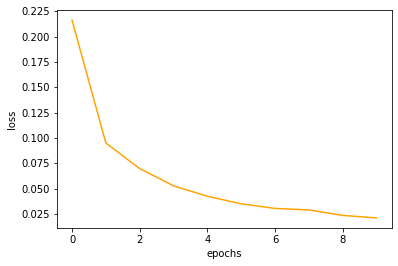

In [21]:
plt.plot(history.history["loss"], color="orange")
plt.xlabel("epochs")
plt.ylabel("loss")
# plt.plot(history.history["accuracy"])


Text(0, 0.5, 'accuracy')

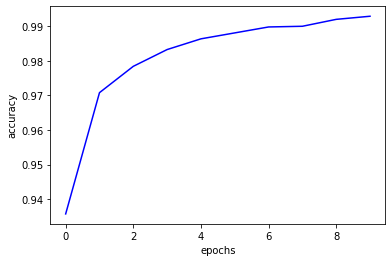

In [22]:
plt.plot(history.history["accuracy"], color="blue")
plt.xlabel("epochs")
plt.ylabel("accuracy")

In [23]:
print(sum(y_train))

tf.Tensor(267236, shape=(), dtype=int64)


<h1>Using Functional API </h1>

In [24]:
inputs = tf.keras.Input(shape=(28,28))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs = inputs, outputs=x)

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
inp = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(filters=128, kernel_size = (3,3),strides=1, padding="same", activation = tf.nn.relu, name="Conv1_128")(inp)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(x)
model = tf.keras.models.Model(inputs=inp, outputs=x)

In [27]:
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=["accuracy"])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv1_128 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1003530   
Total params: 1,004,810
Trainable params: 1,004,810
Non-trainable params: 0
_________________________________________________________________


In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = tf.cast(x_train/255.0, tf.float32), tf.cast(x_test/255.0, tf.float32)
y_train, y_test = tf.cast(y_train, tf.int64), tf.cast(y_test, tf.int64)

In [29]:
x_train, x_test = tf.expand_dims(x_train, axis=-1), tf.expand_dims(x_test, axis=-1)

In [32]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs["accuracy"] > 0.98:
            print(f"Reached accuracy > 0.98. Stopped training")
            self.model.stop_training = True
            
callback = myCallback()

                  

In [33]:
model.fit(x_train, y_train, callbacks=[callback], batch_size=32, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0604 - accuracy: 0.9814


<h1> Using Model Sub Classing <h1>

In [ ]:
class myModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(myModel, self).__init__()
        inputs = tf.keras.layers.Input(shape=(28,28))
        self.x0 = tf.keras.layers.Flatten()
        self.x1 = tf.keras.layers.Dense(512, activation=tf.nn.relu)
        self.x2 = tf.keras.layers.Dropout(0.2)
        self.x3 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        
    def call(self, inputs):
        